## W207 Final Project
#### Authors: Alexandre Baude, Audrey Lei, Allison Schlissel, Vinod Viswanathan, Madeline Whitlow
#### Date: 12/08/21

In [1]:
#Library Import

import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from PIL import Image, ImageOps
from pathlib import Path
from keras.preprocessing.image import img_to_array
from keras.datasets import mnist
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import time
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import MaxPooling2D
from scipy.ndimage import gaussian_filter


# Data Cleaning, Processing and Functions

In [5]:
csv_path = "petfinder-pawpularity-score/train.csv" # change path to wherever your data lives on your computer
image_path = 'petfinder-pawpularity-score/train/'

def CutenessBuckets(pawpularity_score):
    '''
    Function that returns 1 of 10 digits (0-9), bucketting by equal division.
    '''
    if pawpularity_score <= 10:
        return 0
    elif pawpularity_score <= 20:
        return 1
    elif pawpularity_score <= 30:
        return 2
    elif pawpularity_score <= 40:
        return 3
    elif pawpularity_score <= 50:
        return 4
    elif pawpularity_score <= 60:
        return 5
    elif pawpularity_score <= 70:
        return 6
    elif pawpularity_score <= 80:
        return 7
    elif pawpularity_score <= 90:
        return 8
    elif pawpularity_score <= 100:
        return 9

def CutenessBuckets_2(pawpularity_score):
    '''
    Function that returns 1 of 2 digits (0,1), bucketting by equal division.
    '''
    if pawpularity_score <= 50:
        return 0
    elif pawpularity_score <= 100:
        return 1

def CutenessBuckets_3(pawpularity_score):
    '''
    Function that returns 1 of 3 digits (0-2), bucketting by equal division.
    '''
    if pawpularity_score <= 33:
        return 0
    elif pawpularity_score <= 66:
        return 1
    elif pawpularity_score <= 100:
        return 2

def CutenessBuckets_4(pawpularity_score):
    '''
    Function that returns 1 of 4 digits (0-3), bucketting by equal division.
    '''
    if pawpularity_score <= 25:
        return 0
    elif pawpularity_score <= 50:
        return 1
    elif pawpularity_score <= 75:
        return 2
    elif pawpularity_score <= 100:
        return 3
    
def CutenessBuckets_5(pawpularity_score):
    '''
    Function that returns 1 of 5 digits (0-4), bucketting by equal division.
    '''
    if pawpularity_score <= 20:
        return 0
    elif pawpularity_score <= 40:
        return 1
    elif pawpularity_score <= 60:
        return 2
    elif pawpularity_score <= 80:
        return 3
    elif pawpularity_score <= 100:
        return 4
    
def CutenessBuckets_7(pawpularity_score):
    '''
    Function that returns 1 of 7 digits (0-6), bucketting by equal division.
    '''
    if pawpularity_score <= 15:
        return 0
    elif pawpularity_score <= 30:
        return 1
    elif pawpularity_score <= 45:
        return 2
    elif pawpularity_score <= 60:
        return 3
    elif pawpularity_score <= 75:
        return 4
    elif pawpularity_score <= 90:
        return 5
    elif pawpularity_score <= 100:
        return 6

def CutenessBuckets_2_diff_breakpoint(pawpularity_score):
    '''
    Function that returns 1 of 2 digits (0,1), bucketting by skewed division 75 - 25.
    '''
    if pawpularity_score <= 75:
        return 0
    elif pawpularity_score <= 100:
        return 1

def CleanandProcessData(csv_path, image_path, image_resize):
    '''
    Function that takes csv_path, image_path, and image_resize parameters, cleans data, and returns, labels for 2 bucket, 10 bucket, X train data, raw labels, and tags. 
    '''
    # importing csv with image ids and pawpularity scores
    df = pd.read_csv(csv_path)

    # creating path to image using the id in the data frame we've created
    df['path'] = image_path + df['Id'] + '.jpg'
    df['img'] = df['path'].apply(lambda x: Image.open(x).convert("RGB").resize((image_resize,image_resize)))
    
    df['cuteness_bin10'] = df['Pawpularity'].apply(CutenessBuckets)
    df['cuteness_bin2'] = df['Pawpularity'].apply(CutenessBuckets_2)
    df['cuteness_bin3'] = df['Pawpularity'].apply(CutenessBuckets_3)
    df['cuteness_bin4'] = df['Pawpularity'].apply(CutenessBuckets_4)
    df['cuteness_bin5'] = df['Pawpularity'].apply(CutenessBuckets_5)
    df['cuteness_bin7'] = df['Pawpularity'].apply(CutenessBuckets_7)
    df['cuteness_bin2diff'] = df['Pawpularity'].apply(CutenessBuckets_2_diff_breakpoint)
    
    df['img_array'] = df['img'].apply(lambda x: img_to_array(x)/255)

    labels_raw=[]
    labels_bin = []
    labels_bin2 = []
    #labels_bin2diff = []
    #labels_bin3 = []
    #labels_bin4 = []
    #labels_bin5 = []
    #labels_bin7 = []
    labels_bin10 = []
    tags = []
    imgArr=[]


    for ind in df.index:
        tags_data=[]
        img = df.img_array[ind]
        imgArr.append(img)
        labels_raw.append(df['Pawpularity'][ind])
        labels_bin2.append(df['cuteness_bin2'][ind])
        #labels_bin2diff.append(df['cuteness_bin2diff'][ind])
        #labels_bin3.append(df['cuteness_bin3'][ind])
        #labels_bin4.append(df['cuteness_bin4'][ind])
        #labels_bin5.append(df['cuteness_bin5'][ind])
        #labels_bin7.append(df['cuteness_bin7'][ind])
        labels_bin10.append(df['cuteness_bin10'][ind])
        tags_data.append(df['Subject Focus'][ind])
        tags_data.append(df['Eyes'][ind])
        tags_data.append(df['Face'][ind])
        tags_data.append(df['Near'][ind])
        tags_data.append(df['Accessory'][ind])
        tags_data.append(df['Group'][ind])
        tags_data.append(df['Collage'][ind])
        tags_data.append(df['Human'][ind])
        tags_data.append(df['Occlusion'][ind])
        tags_data.append(df['Info'][ind])
        tags_data.append(df['Blur'][ind])            
        tags.append(np.array(tags_data, dtype=int))

    
    labels_raw = np.array(labels_raw)
    labels_bin2 = np.array(labels_bin2)
    #labels_bin2diff = np.array(labels_bin2diff)
    #labels_bin3 = np.array(labels_bin3)
    #labels_bin4 = np.array(labels_bin4)
    #labels_bin5 = np.array(labels_bin5)
    #labels_bin7 = np.array(labels_bin7)
    labels_bin10 = np.array(labels_bin10)
    tags= np.array(tags,dtype=int)
    
    
    X_train=np.array(imgArr, dtype=float)
    print('Training Shape:',X_train.shape)
    print('Labels Shape;', labels_raw.shape)
    return X_train, labels_raw, labels_bin2, labels_bin10, tags

X_train, labels_raw, labels_bin2, labels_bin10, tags= CleanandProcessData(csv_path, image_path, 50)

Training Shape: (9912, 50, 50, 3)
Labels Shape; (9912,)


In [6]:
# Shuffling data and separating into train, test and dev sets
shuffle = np.random.permutation(np.arange(X_train.shape[0]))

X_train, labels_raw, labels_bin2, labels_bin10, tags = X_train[shuffle], labels_raw[shuffle], labels_bin2[shuffle],labels_bin10[shuffle], tags[shuffle]

print('data shape: ', X_train.shape)
print('pawpularity label shape:', labels_raw.shape)
print('2 bin label shape:', labels_bin2.shape)
print('10 bin label shape:', labels_bin10.shape)
print('Tags shape:', tags.shape)

# Set some variables to hold test, dev, and training data.
train_data, train_labels_raw, train_labels_bin10, train_labels_bin2, train_tags  = X_train[:7920], labels_raw[:7920], labels_bin10[:7920], labels_bin2[:7920], tags[:7920]
dev_data, dev_labels_raw, dev_labels_bin10, dev_labels_bin2, dev_tags = X_train[7920:8916], labels_raw[7920:8916], labels_bin10[7920:8916], labels_bin2[7920:8916], tags[7920:8916]
test_data, test_labels_raw, test_labels_bin10, test_labels_bin2, test_tags = X_train[8916:], labels_raw[8916:], labels_bin10[8916:], labels_bin2[8916:], tags[8916:]

# raw labels (ie original pawpularity score)
test_labels_category = to_categorical(test_labels_raw)
train_labels_category = to_categorical(train_labels_raw)
dev_labels_category = to_categorical(dev_labels_raw)

# bucketed labels 
test_labels_bins_category2 = to_categorical(test_labels_bin2)
train_labels_bins_category2 = to_categorical(train_labels_bin2)
dev_labels_bins_category2 = to_categorical(dev_labels_bin2)

test_labels_bins_category10 = to_categorical(test_labels_bin10)
train_labels_bins_category10 = to_categorical(train_labels_bin10)
dev_labels_bins_category10 = to_categorical(dev_labels_bin10)


# blurred image data (optional use)
blurred_train = gaussian_filter(train_data, sigma=1)
blurred_test = gaussian_filter(test_data, sigma = 1)

print(f'Train Data Size: {train_data.shape[0]}')
print(f'Test Data Size: {test_data.shape[0]}')
print(f'Dev Data Size: {dev_data.shape[0]}')

data shape:  (9912, 50, 50, 3)
pawpularity label shape: (9912,)
2 bin label shape: (9912,)
10 bin label shape: (9912,)
Tags shape: (9912, 11)
Train Data Size: 7920
Test Data Size: 996
Dev Data Size: 996


# CNN Model #1 Raw Data 

In [7]:
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
possible_outcomes = 101
# first model attempt (using raw pawpularity scores)
# switch out activation to 'sigmoid'
# try different pixel amounts (100x100) (20x20) etc
# try binary crosstentropy vs categorical 
# adjust epochs


model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(possible_outcomes, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model

print('-'*10, 'CNN Model #1 with all Paw scores', '-'*10)
model.fit(train_data,train_labels_category, validation_data=(test_data, test_labels_category), epochs=3)
# evaluate the model
score = model.evaluate(test_data, test_labels_category, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

---------- CNN Model 1 with all Paw scores ----------
Epoch 1/3
248/248 [==============================] - 22s 51ms/step - loss: 4.3053 - accuracy: 0.0300 - val_loss: 4.2081 - val_accuracy: 0.0371
Epoch 2/3
248/248 [==============================] - 13s 51ms/step - loss: 4.2134 - accuracy: 0.0281 - val_loss: 4.2241 - val_accuracy: 0.0251
Epoch 3/3
32/32 [==============================] - 0s 9ms/step - loss: 4.2158 - accuracy: 0.0251

Test loss: 4.2157979011535645
Test accuracy: 0.025100402534008026


# CNN Model #1 10 Bucket

In [8]:
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
possible_outcomes = 10
# first model attempt (using raw pawpularity scores)
# switch out activation to 'sigmoid'
# try different pixel amounts (100x100) (20x20) etc
#try binary crosstentropy vs categorical 
#adjust epochs


model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(possible_outcomes, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model

print('-'*10, 'CNN Model #1 With 10 Bucket Paw Scores', '-'*10)
model.fit(train_data,train_labels_bins_category10, validation_data=(test_data, test_labels_bins_category10), epochs=3)
# evaluate the model
score = model.evaluate(test_data, test_labels_bins_category10, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

---------- CNN Model 1 with all Paw scores ----------
Epoch 1/3
248/248 [==============================] - 13s 49ms/step - loss: 2.0145 - accuracy: 0.2608 - val_loss: 1.9870 - val_accuracy: 0.2620
Epoch 2/3
248/248 [==============================] - 12s 47ms/step - loss: 1.9715 - accuracy: 0.2798 - val_loss: 1.9859 - val_accuracy: 0.2620
Epoch 3/3
32/32 [==============================] - 0s 10ms/step - loss: 1.9850 - accuracy: 0.2681

Test loss: 1.9850350618362427
Test accuracy: 0.2680722773075104


# CNN Model #1 2 Bucket

In [11]:
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
possible_outcomes = 2
# first model attempt (using raw pawpularity scores)
# switch out activation to 'sigmoid'
# try different pixel amounts (100x100) (20x20) etc
#try binary crosstentropy vs categorical 
#adjust epochs


model = Sequential()#add model layers
model.add(Conv2D(32, kernel_size=(5, 5),
                     activation='relu',
                     input_shape=shape))

model.add(MaxPooling2D(pool_size=(2, 2)))
# add second convolutional layer with 20 filters
model.add(Conv2D(64, (5, 5), activation='relu'))
    
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
    
# flatten data
model.add(Flatten())
    
# add a dense all-to-all relu layer
model.add(Dense(1024, activation='relu'))
    
# apply dropout with rate 0.5
model.add(Dropout(0.5))
    
# soft-max layer
model.add(Dense(possible_outcomes, activation='softmax'))
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#train the model

print('-'*10, 'CNN Model #1 2 Bucket Paw Scores', '-'*10)
model.fit(train_data,train_labels_bins_category2, validation_data=(test_data, test_labels_bins_category2), epochs=3)
# evaluate the model
score = model.evaluate(test_data, test_labels_bins_category2, verbose=1)
# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

---------- CNN Model #1 2 Bucket Paw Scores ----------
Epoch 1/3
248/248 [==============================] - 13s 50ms/step - loss: 0.5447 - accuracy: 0.7847 - val_loss: 0.5208 - val_accuracy: 0.7851
Epoch 2/3
248/248 [==============================] - 11s 46ms/step - loss: 0.5097 - accuracy: 0.7968 - val_loss: 0.5200 - val_accuracy: 0.7851
Epoch 3/3
32/32 [==============================] - 0s 9ms/step - loss: 0.5199 - accuracy: 0.7851

Test loss: 0.519910454750061
Test accuracy: 0.7851405739784241


# CNN Model #2 Raw Data

In [13]:
# model from kaggle page 
# https://www.kaggle.com/alexteboul/tutorial-part-3-cnn-image-modeling-1

# this accuracy seems to be higher we could mess around with different filters/padding etc
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
inputs = tf.keras.Input(shape=shape)

#start off with x just being those inputs
x = inputs

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (7,7), strides = (2,2), padding='valid', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

model.compile(
    loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

data_augmentation = ImageDataGenerator(
    rotation_range = 15, 
    zoom_range = 0.15,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.1,
    horizontal_flip = True, 
    fill_mode = "nearest")
history = model.fit(
    data_augmentation.flow(train_data,train_labels_category,batch_size=32),
    validation_data = (test_data, test_labels_category),
    steps_per_epoch = len(train_data) // 32,
    epochs = 3
)
score = model.evaluate(test_data, test_labels_category, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/3
247/247 [==============================] - 10s 37ms/step - loss: 0.6037 - rmse: 0.6015 - mae: 0.2837 - mape: 273281888.0000 - val_loss: 0.2638 - val_rmse: 0.1504 - val_mae: 0.0895 - val_mape: 79088008.0000
Epoch 2/3
247/247 [==============================] - 9s 35ms/step - loss: 0.2515 - rmse: 0.1083 - mae: 0.0376 - mape: 27781102.0000 - val_loss: 0.2489 - val_rmse: 0.1027 - val_mae: 0.0264 - val_mape: 16570696.0000
Epoch 3/3
32/32 [==============================] - 0s 6ms/step - loss: 0.2448 - rmse: 0.1002 - mae: 0.0215 - mape: 11665138.0000
Test accuracy: 0.10022038966417313


# CNN Model #2 10 Bucket

In [14]:
# model from kaggle page 
# https://www.kaggle.com/alexteboul/tutorial-part-3-cnn-image-modeling-1

# this accuracy seems ot be higher we could mess around with different filters/padding etc
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
inputs = tf.keras.Input(shape=shape)

#start off with x just being those inputs
x = inputs

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (7,7), strides = (2,2), padding='valid', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

model.compile(
    loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

data_augmentation = ImageDataGenerator(
    rotation_range = 15, 
    zoom_range = 0.15,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.1,
    horizontal_flip = True, 
    fill_mode = "nearest")
history = model.fit(
    data_augmentation.flow(train_data,train_labels_bins_category10,batch_size=32),
    validation_data = (test_data, test_labels_bins_category10),
    steps_per_epoch = len(train_data) // 32,
    epochs = 3
)
score = model.evaluate(test_data, test_labels_bins_category10, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/3
247/247 [==============================] - 10s 36ms/step - loss: 0.7061 - rmse: 0.6804 - mae: 0.3803 - mape: 282312480.0000 - val_loss: 0.3717 - val_rmse: 0.3592 - val_mae: 0.2267 - val_mape: 129160144.0000
Epoch 2/3
247/247 [==============================] - 9s 35ms/step - loss: 0.3346 - rmse: 0.3049 - mae: 0.1767 - mape: 85957560.0000 - val_loss: 0.3320 - val_rmse: 0.3028 - val_mae: 0.1750 - val_mape: 84133336.0000
Epoch 3/3
32/32 [==============================] - 0s 6ms/step - loss: 0.3283 - rmse: 0.3020 - mae: 0.1799 - mape: 89780640.0000
Test accuracy: 0.30199435353279114


# CNN Model #2 2 Bucket

In [10]:
# model from kaggle page 
# https://www.kaggle.com/alexteboul/tutorial-part-3-cnn-image-modeling-1

# this accuracy seems ot be higher we could mess around with different filters/padding etc
shape = (train_data.shape[1],train_data.shape[2], train_data.shape[3])
inputs = tf.keras.Input(shape=shape)

#start off with x just being those inputs
x = inputs

x = tf.keras.layers.Conv2D(filters = 16, kernel_size = (7,7), strides = (2,2), padding='valid', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), padding='same', activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)


x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
x = tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding='same', kernel_initializer='he_normal', kernel_regularizer=l2(0.0002), activation = 'relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512, activation = "relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)

output = tf.keras.layers.Dense(1)(x)

model = tf.keras.Model(inputs = inputs, outputs = output)

model.compile(
    loss = 'mse', 
    optimizer = 'Adam', 
    metrics = [tf.keras.metrics.RootMeanSquaredError(name="rmse"), "mae", "mape"])

data_augmentation = ImageDataGenerator(
    rotation_range = 15, 
    zoom_range = 0.15,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.1,
    horizontal_flip = True, 
    fill_mode = "nearest")
history = model.fit(
    data_augmentation.flow(train_data,train_labels_bins_category2,batch_size=32),
    validation_data = (test_data, test_labels_bins_category2),
    steps_per_epoch = len(train_data) // 32,
    epochs = 3
)
score = model.evaluate(test_data, test_labels_bins_category2, verbose=1)
print('Test accuracy:', score[1])

Epoch 1/3
247/247 [==============================] - 10s 37ms/step - loss: 0.9727 - rmse: 0.8543 - mae: 0.6365 - mape: 307340608.0000 - val_loss: 0.5632 - val_rmse: 0.5664 - val_mae: 0.5064 - val_mape: 350929408.0000
Epoch 2/3
247/247 [==============================] - 8s 34ms/step - loss: 0.5049 - rmse: 0.5134 - mae: 0.5001 - mape: 241255392.0000 - val_loss: 0.4953 - val_rmse: 0.5052 - val_mae: 0.5002 - val_mape: 253025696.0000
Epoch 3/3
32/32 [==============================] - 0s 6ms/step - loss: 0.4885 - rmse: 0.5016 - mae: 0.5000 - mape: 235480352.0000
Test accuracy: 0.5016438961029053


# Naive Bayes & KNN

In [16]:
#Data Reshape
train_size = train_data.shape[0]
train_shape = train_data.shape[1]*train_data.shape[2]*train_data.shape[3]

test_size = test_data.shape[0]
test_shape = test_data.shape[1]*test_data.shape[2]*test_data.shape[3]

train_data_temp = train_data.reshape(train_size,train_shape)
test_data_temp = test_data.reshape(test_size,test_shape)

### KNN Raw Paw

In [11]:
print('-'*10, ' K Nearest Neighbor Raw ', '-'*10)
for k in [1,2,3,5,7]:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(train_data_temp, train_labels_raw)
    test_predicted_labels = knnmodel.predict(test_data_temp)
    print("accuracy with k =", k, " : ", metrics.accuracy_score(test_labels_raw, test_predicted_labels))

----------  K Nearest Neighbor Raw  ----------
accuracy with k = 1  :  0.019076305220883535
accuracy with k = 2  :  0.02610441767068273
accuracy with k = 3  :  0.024096385542168676
accuracy with k = 5  :  0.020080321285140562
accuracy with k = 7  :  0.01706827309236948


### NB Raw Paw

In [17]:
print('-'*15, 'Naive Bayes Raw Paw Data ', '-'*15)
for a in [1.0e-10, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    naive_bayes_model1 = BernoulliNB(alpha = a)
    naive_bayes_model1.fit(train_data_temp, train_labels_raw)
    print (f'Bernoulli Model accuracy for alpha {a} : %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_raw))

--------------- Naive Bayes Raw Paw Data  ---------------
Bernoulli Model accuracy for alpha 1e-10 : 0.0090
Bernoulli Model accuracy for alpha 0.001 : 0.0080
Bernoulli Model accuracy for alpha 0.01 : 0.0080
Bernoulli Model accuracy for alpha 0.1 : 0.0251
Bernoulli Model accuracy for alpha 0.5 : 0.0301
Bernoulli Model accuracy for alpha 1.0 : 0.0271
Bernoulli Model accuracy for alpha 2.0 : 0.0231
Bernoulli Model accuracy for alpha 10.0 : 0.0281


### KNN 10 Bucket


In [14]:
print('-'*10, ' K Nearest Neighbor 10 Bucket ', '-'*10)
for k in [1,2,3,5,7,8,9,10]:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(train_data_temp, train_labels_bin10)
    test_predicted_labels = knnmodel.predict(test_data_temp)
    print("accuracy with k =", k, " : ", metrics.accuracy_score(test_labels_bin10, test_predicted_labels))

----------  K Nearest Neighbor 10 Bucket  ----------
accuracy with k = 1  :  0.1636546184738956
accuracy with k = 2  :  0.18072289156626506
accuracy with k = 3  :  0.1746987951807229
accuracy with k = 5  :  0.19477911646586346
accuracy with k = 7  :  0.20281124497991967
accuracy with k = 8  :  0.20281124497991967
accuracy with k = 9  :  0.20080321285140562
accuracy with k = 10  :  0.1927710843373494


### NB 10 Bucket

In [18]:
print('-'*15, 'Naive Bayes 10 Bucket ', '-'*15)
for a in [1.0e-10, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    naive_bayes_model1 = BernoulliNB(alpha = a)
    naive_bayes_model1.fit(train_data_temp, train_labels_bin10)
    print (f'Bernoulli Model accuracy for alpha {a} : %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_bin10))

--------------- Naive Bayes 10 Bucket  ---------------
Bernoulli Model accuracy for alpha 1e-10 : 0.0803
Bernoulli Model accuracy for alpha 0.001 : 0.0753
Bernoulli Model accuracy for alpha 0.01 : 0.0683
Bernoulli Model accuracy for alpha 0.1 : 0.0572
Bernoulli Model accuracy for alpha 0.5 : 0.1275
Bernoulli Model accuracy for alpha 1.0 : 0.1365
Bernoulli Model accuracy for alpha 2.0 : 0.2600
Bernoulli Model accuracy for alpha 10.0 : 0.2711


### KNN 2 Buckets

In [16]:
print('-'*10, ' K Nearest Neighbor 2 Bucket ', '-'*10)
for k in [1,2,3,5,7,8,9,10]:
    knnmodel = KNeighborsClassifier(n_neighbors=k)
    knnmodel.fit(train_data_temp, train_labels_bin2)
    test_predicted_labels = knnmodel.predict(test_data_temp)
    print("accuracy with k =", k, " : ", metrics.accuracy_score(test_labels_bin2, test_predicted_labels))

----------  K Nearest Neighbor 2 Bucket  ----------
accuracy with k = 1  :  0.6315261044176707
accuracy with k = 2  :  0.7319277108433735
accuracy with k = 3  :  0.6897590361445783
accuracy with k = 5  :  0.7299196787148594
accuracy with k = 7  :  0.7399598393574297
accuracy with k = 8  :  0.7630522088353414
accuracy with k = 9  :  0.75
accuracy with k = 10  :  0.7610441767068273


### NB 2 Buckets

In [19]:
print('-'*15, 'Naive Bayes 2 Bucket ', '-'*15)
for a in [1.0e-10, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
    naive_bayes_model1 = BernoulliNB(alpha = a)
    naive_bayes_model1.fit(train_data_temp, train_labels_bin2)
    print (f'Bernoulli Model accuracy for alpha {a}: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_bin2))

--------------- Naive Bayes 2 Bucket  ---------------
Bernoulli Model accuracy for alpha 1e-10: 0.7811
Bernoulli Model accuracy for alpha 0.001: 0.7801
Bernoulli Model accuracy for alpha 0.01: 0.7791
Bernoulli Model accuracy for alpha 0.1: 0.7741
Bernoulli Model accuracy for alpha 0.5: 0.7651
Bernoulli Model accuracy for alpha 1.0: 0.7620
Bernoulli Model accuracy for alpha 2.0: 0.7550
Bernoulli Model accuracy for alpha 10.0: 0.7641


## Plotting KNN and NB

In [23]:
#Building dataframes for each of the bins

df = pd.read_csv("../petfinder-pawpularity-score/train.csv")
df['cuteness_bin10'] = df['Pawpularity'].apply(CutenessBuckets)
df['cuteness_bin2'] = df['Pawpularity'].apply(CutenessBuckets_2)
df['cuteness_bin3'] = df['Pawpularity'].apply(CutenessBuckets_3)
df['cuteness_bin4'] = df['Pawpularity'].apply(CutenessBuckets_4)
df['cuteness_bin5'] = df['Pawpularity'].apply(CutenessBuckets_5)
df['cuteness_bin7'] = df['Pawpularity'].apply(CutenessBuckets_7)
df['CutenessBuckets_2_diff_breakpoint'] = df['Pawpularity'].apply(CutenessBuckets_2_diff_breakpoint)

labels_raw10 = np.array(df['cuteness_bin10'])
labels_raw2 = np.array(df['cuteness_bin2'])
labels_raw3 = np.array(df['cuteness_bin3'])
labels_raw4 = np.array(df['cuteness_bin4'])
labels_raw5 = np.array(df['cuteness_bin5'])
labels_raw7 = np.array(df['cuteness_bin7'])
labels_raw2_diff = np.array(df['CutenessBuckets_2_diff_breakpoint'])

train_labels_raw10 =  labels_raw10[:7920]
test_labels_raw10 = labels_raw10[8916:]

train_labels_raw2 =  labels_raw2[:7920]
test_labels_raw2 = labels_raw2[8916:]

train_labels_raw3 =  labels_raw3[:7920]
test_labels_raw3 = labels_raw3[8916:]

train_labels_raw4 =  labels_raw4[:7920]
test_labels_raw4 = labels_raw4[8916:]

train_labels_raw5 =  labels_raw5[:7920]
test_labels_raw5 = labels_raw5[8916:]

train_labels_raw7 =  labels_raw7[:7920]
test_labels_raw7 = labels_raw7[8916:]

train_labels_raw2diff =  labels_raw2_diff[:7920]
test_labels_raw2diff = labels_raw2_diff[8916:]

train_labels_list = [train_labels_raw2diff, 
                     train_labels_raw2, 
                     train_labels_raw3, 
                     train_labels_raw4,
                     train_labels_raw5,
                     train_labels_raw7,
                     train_labels_raw10]
test_labels_list = [test_labels_raw2diff, 
                    test_labels_raw2, 
                    test_labels_raw3, 
                    test_labels_raw4,
                    test_labels_raw5,
                    test_labels_raw7,
                    test_labels_raw10
                    ]
bucket_list = ['2_diff','2','3','4','5','7','10']

### KNN Modeling (WARNING: THIS TAKES A LONG, LONG TIME TO RUN)

In [19]:

stored_buckets = []
stored_accuracies = []
stored_k = []

for k in [1,2,3,5,7,10,20,]: #for each k value
    for i in range(len(train_labels_list)): #for each bucket

        knnmodel = KNeighborsClassifier(n_neighbors=k)
        knnmodel.fit(train_data_temp, train_labels_list[i])
        test_predicted_labels = knnmodel.predict(test_data_temp)
        stored_buckets.append(bucket_list[i])
        stored_accuracies.append(metrics.accuracy_score(test_labels_list[i], test_predicted_labels))
        stored_k.append(k)
        
        print("bucket size = :" ,bucket_list[i])
        print("accuracy with k =", k, " : ", metrics.accuracy_score(test_labels_list[i], test_predicted_labels))

bucket size = : 2_diff
accuracy with k = 1  :  0.8534136546184738
bucket size = : 2
accuracy with k = 1  :  0.6566265060240963
bucket size = : 3
accuracy with k = 1  :  0.40160642570281124
bucket size = : 4
accuracy with k = 1  :  0.3845381526104418
bucket size = : 5
accuracy with k = 1  :  0.30220883534136544
bucket size = : 7
accuracy with k = 1  :  0.24397590361445784
bucket size = : 10
accuracy with k = 1  :  0.15060240963855423
bucket size = : 2_diff
accuracy with k = 2  :  0.9317269076305221
bucket size = : 2
accuracy with k = 2  :  0.7590361445783133
bucket size = : 3
accuracy with k = 2  :  0.4678714859437751
bucket size = : 4
accuracy with k = 2  :  0.4186746987951807
bucket size = : 5
accuracy with k = 2  :  0.35943775100401604
bucket size = : 7
accuracy with k = 2  :  0.28112449799196787
bucket size = : 10
accuracy with k = 2  :  0.18373493975903615
bucket size = : 2_diff
accuracy with k = 3  :  0.9146586345381527
bucket size = : 2
accuracy with k = 3  :  0.7208835341365462


### Plotting the KNN Model

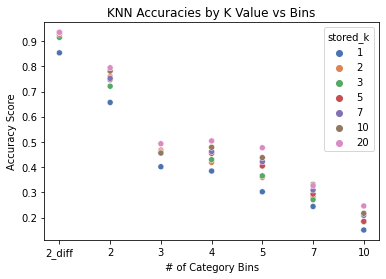

In [134]:

accuracies_df = pd.DataFrame({'stored_buckets':stored_buckets, 'stored_accuracies':stored_accuracies, 'stored_k':stored_k})
colors = {1: 'purple', 2: 'green', 3: 'blue', 5: 'orange', 7: 'pink', 10: 'yellow', 20: 'red'}

sns.scatterplot(data = accuracies_df, x = accuracies_df.stored_buckets, y = accuracies_df.stored_accuracies, hue = accuracies_df.stored_k, palette = "deep")
plt.title("KNN Accuracies by K Value vs Bins")
plt.xlabel("# of Category Bins")
plt.ylabel("Accuracy Score")
plt.show()

In [21]:
#Highest accuracies
print(accuracies_df.sort_values(['stored_accuracies'], ascending=False).head(10))

   stored_buckets  stored_accuracies  stored_k
35         2_diff           0.934739        10
42         2_diff           0.934739        20
28         2_diff           0.933735         7
7          2_diff           0.931727         2
21         2_diff           0.927711         5
14         2_diff           0.914659         3
0          2_diff           0.853414         1
43              2           0.794177        20
36              2           0.781124        10
8               2           0.759036         2


### NB Model (Doesn't take as long to run)

In [24]:
nb_stored_buckets = []
nb_stored_accuracies = []
nb_stored_k = []

for a in [1.0e-10, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]:
#for a in [1.0e-10, 0.1, 1, 10]:
    for i in range(len(train_labels_list)):
        naive_bayes_model1 = BernoulliNB(alpha = a)
        naive_bayes_model1.fit(train_data_temp, train_labels_list[i])

        nb_stored_buckets.append(bucket_list[i])
        nb_stored_accuracies.append(naive_bayes_model1.score(test_data_temp, test_labels_list[i]))
        nb_stored_k.append(a)

        print(f'FOR ALPHA {a}')
        print("bucket size = :" ,bucket_list[i])
        print (f'Bernoulli Model accuracy for alpha {a}: %3.4f' %naive_bayes_model1.score(test_data_temp, test_labels_list[i]))
    print('\n')

FOR ALPHA 1e-10
bucket size = : 2_diff
Bernoulli Model accuracy for alpha 1e-10: 0.2520
FOR ALPHA 1e-10
bucket size = : 2
Bernoulli Model accuracy for alpha 1e-10: 0.7731
FOR ALPHA 1e-10
bucket size = : 3
Bernoulli Model accuracy for alpha 1e-10: 0.1586
FOR ALPHA 1e-10
bucket size = : 4
Bernoulli Model accuracy for alpha 1e-10: 0.1345
FOR ALPHA 1e-10
bucket size = : 5
Bernoulli Model accuracy for alpha 1e-10: 0.1215
FOR ALPHA 1e-10
bucket size = : 7
Bernoulli Model accuracy for alpha 1e-10: 0.0924
FOR ALPHA 1e-10
bucket size = : 10
Bernoulli Model accuracy for alpha 1e-10: 0.1145


FOR ALPHA 0.001
bucket size = : 2_diff
Bernoulli Model accuracy for alpha 0.001: 0.2249
FOR ALPHA 0.001
bucket size = : 2
Bernoulli Model accuracy for alpha 0.001: 0.7701
FOR ALPHA 0.001
bucket size = : 3
Bernoulli Model accuracy for alpha 0.001: 0.1566
FOR ALPHA 0.001
bucket size = : 4
Bernoulli Model accuracy for alpha 0.001: 0.1325
FOR ALPHA 0.001
bucket size = : 5
Bernoulli Model accuracy for alpha 0.001

### Plotting NB Model

   stored_buckets  stored_accuracies      stored_a
49         2_diff           0.913655  1.000000e+01
42         2_diff           0.884538  2.000000e+00
35         2_diff           0.868474  1.000000e+00
1               2           0.773092  1.000000e-10
8               2           0.770080  1.000000e-03
15              2           0.770080  1.000000e-02
50              2           0.768072  1.000000e+01
22              2           0.767068  1.000000e-01
43              2           0.762048  2.000000e+00
29              2           0.760040  5.000000e-01
36              2           0.758032  1.000000e+00
52              4           0.511044  1.000000e+01
51              3           0.507028  1.000000e+01
45              4           0.495984  2.000000e+00
53              5           0.494980  1.000000e+01
44              3           0.485944  2.000000e+00
37              3           0.464859  1.000000e+00
46              5           0.442771  2.000000e+00
54              7           0.3

Text(0, 0.5, 'Accuracy Score')

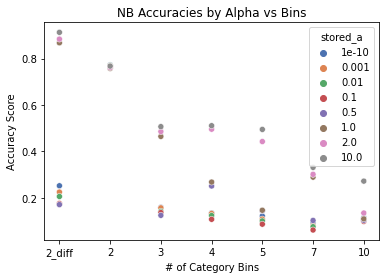

In [25]:
nb_accuracies_df = pd.DataFrame({'stored_buckets':nb_stored_buckets, 'stored_accuracies':nb_stored_accuracies, 'stored_a':nb_stored_k}) #building dataframe for plotting
colors = {1.0e-10: 'purple', 0.001: 'green', 0.01: 'blue', 0.1: 'orange', 0.5: 'pink',  1.0: 'yellow', 2.0: 'red', 10.0: 'black'}

#Printing highest NB Accuracies
print(nb_accuracies_df.sort_values(['stored_accuracies'], ascending=False))

sns.scatterplot(data = nb_accuracies_df, x = nb_accuracies_df.stored_buckets, y = nb_accuracies_df.stored_accuracies, hue = nb_accuracies_df.stored_a, palette = "deep")
plt.title("NB Accuracies by Alpha vs Bins")
plt.xlabel("# of Category Bins")
plt.ylabel("Accuracy Score")

### KNN vs NB Mean Score Comparison and Plot

In [118]:
nb_df = nb_accuracies_df.groupby(['stored_buckets']).mean()
knn_df = accuracies_df.groupby(['stored_buckets']).mean()

nb_df['model'] = "NB"
knn_df['model'] = "KNN"

nb_df = nb_df.drop(columns = ['stored_a'])
knn_df = knn_df.drop(columns = ['stored_k'])
# print(knn_df)
# print(nb_df)

final_df = knn_df.append(nb_df)
final_df['colors'] = np.where(final_df['model'] == 'KNN', 'red', 'blue')
final_df = final_df.sort_index(ascending=False)
final_df

,stored_accuracies,model,colors
stored_buckets,,,
7,0.293746,KNN,red
7,0.165537,NB,blue
5,0.395439,KNN,red
5,0.255522,NB,blue
4,0.447504,KNN,red
4,0.254518,NB,blue
3,0.456684,KNN,red
3,0.434362,NB,blue
2_diff,0.918675,KNN,red


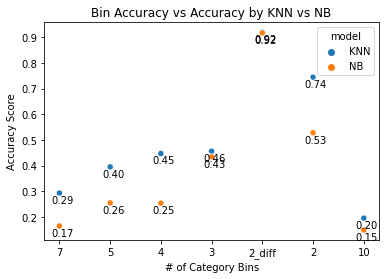

In [122]:

sns.scatterplot(data = final_df, x = final_df.index, y = final_df.stored_accuracies, hue = final_df.model)
for x, y in zip(final_df.index, final_df.stored_accuracies):
    label = "{:.2f}".format(y)
    plt.annotate(label,
                (x, y),
                textcoords = "offset points",
                xytext = (3,-10),
                ha = 'center')
plt.title("Bin Accuracy vs Accuracy by KNN vs NB")
plt.xlabel("# of Category Bins")
plt.ylabel("Accuracy Score")
plt.show()

# Check Specific Animal Image

In [33]:
train_size = train_data.shape[0]
train_shape = train_data.shape[1]*train_data.shape[2]*train_data.shape[3]

test_size = test_data.shape[0]
test_shape = test_data.shape[1]*test_data.shape[2]*test_data.shape[3]

train_data_temp = train_data.reshape(train_size,train_shape)
test_data_temp = test_data.reshape(test_size,test_shape)

def checkMyPet(path):
    knnmodel = KNeighborsClassifier(n_neighbors=7)
    knnmodel.fit(train_data_temp, train_labels_raw5)

    x_original = Image.open(path).convert("RGB").resize((50,50))
    x = img_to_array(x_original)/255
    x = x.reshape(1, 50*50*3)
    y = knnmodel.predict(x)
    plt.imshow(x_original)
    print('Your pet got a score of : ', y, ' out of 5')
    

Your pet got a score of :  [1]  out of 5


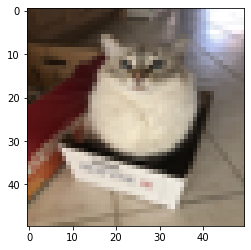

In [34]:
#Clio
checkMyPet('C:/Users/alebo/Desktop/Berkeley/W207/w207-final-project/Pics/clio.png')

Your pet got a score of :  [1]  out of 5


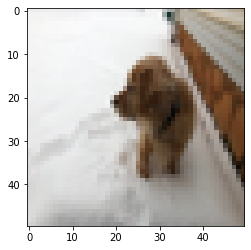

In [35]:
#Teak 1
checkMyPet('C:/Users/alebo/Desktop/Berkeley/W207/w207-final-project/Pics/Teak.jpeg')

Your pet got a score of :  [1]  out of 5


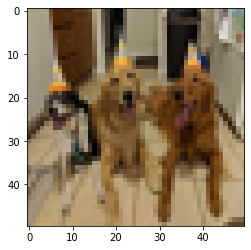

In [36]:
#Teak 2
checkMyPet('C:/Users/alebo/Desktop/Berkeley/W207/w207-final-project/Pics/Teak2.jpeg')